In [2]:
#import anything
import numpy as np 
import pandas as pd 
from collections import Counter
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt  
import itertools


In [11]:
def grabTop15PlayersNoPipeline(dataframe1, dataframe2):
    guard_counter = 0
    forward_counter = 0
    center_counter = 0
    top_all_nba = []
    if "Predicted_Prob" in dataframe1.columns:
        dataframe1.drop(["Predicted_Prob"],axis=1,inplace=True)
    true_all_NBA = dataframe1.loc[dataframe1.All_NBA == True,"Player"]
    dataframe1["Predicted_Prob"] = gauss_bayes_pipeline.predict_proba(dataframe2)[:,1]
    filtered_df = dataframe1.reindex(columns = ['Player','Pos','Predicted_Prob'])
    sorted_filtered_df = filtered_df.sort_values(by='Predicted_Prob',ascending=False).loc[filtered_df["Predicted_Prob"] != 0]   

    for player in range(len(sorted_filtered_df.index)):
        if sorted_filtered_df.iloc[player,:]["Pos"] == "PG" or sorted_filtered_df.iloc[player,:]["Pos"] == "SG":
            if(guard_counter < 6):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                guard_counter += 1
        elif sorted_filtered_df.iloc[player,:]["Pos"] == "SF" or sorted_filtered_df.iloc[player,:]["Pos"] == "PF":
            if(forward_counter < 6):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                forward_counter += 1
        elif sorted_filtered_df.iloc[player,:]["Pos"] == "C":
            if(center_counter < 3):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                center_counter += 1
    
    print("True Top 15 Players:",true_all_NBA)
    print("Predicted Top 15 Players:", top_all_nba)
    wrong_predict_players = [players for players in top_all_nba if players not in true_all_NBA.unique()]
    print("Top 15 predicted players who didn't make All-NBA:", wrong_predict_players)
    print()
    missed_players = [players for players in true_all_NBA.unique() if players not in top_all_nba]
    print("Top 15 players who werent predicted top 15:",missed_players)
    print()
    print("Percent correct of Top 15 Players:",(15-len(wrong_predict_players))/15)   


def grabTop15PlayersNoUnderSample(dataframe1, dataframe2):
    guard_counter = 0
    forward_counter = 0
    center_counter = 0
    top_all_nba = []
    if "Predicted_Prob" in dataframe1.columns:
        dataframe1.drop(["Predicted_Prob"],axis=1,inplace=True)
    true_all_NBA = dataframe1.loc[dataframe1.All_NBA == True,"Player"]
    dataframe1["Predicted_Prob"] = pipeline_no_undersample.predict_proba(dataframe2)[:,1]
    filtered_df = dataframe1.reindex(columns = ['Player','Pos','Predicted_Prob'])
    sorted_filtered_df = filtered_df.sort_values(by='Predicted_Prob',ascending=False).loc[filtered_df["Predicted_Prob"] != 0]   

    for player in range(len(sorted_filtered_df.index)):
        if sorted_filtered_df.iloc[player,:]["Pos"] == "PG" or sorted_filtered_df.iloc[player,:]["Pos"] == "SG":
            if(guard_counter < 6):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                guard_counter += 1
        elif sorted_filtered_df.iloc[player,:]["Pos"] == "SF" or sorted_filtered_df.iloc[player,:]["Pos"] == "PF":
            if(forward_counter < 6):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                forward_counter += 1
        elif sorted_filtered_df.iloc[player,:]["Pos"] == "C":
            if(center_counter < 3):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                center_counter += 1
    
    print("True Top 15 Players:",true_all_NBA)
    print("Predicted Top 15 Players:", top_all_nba)
    wrong_predict_players = [players for players in top_all_nba if players not in true_all_NBA.unique()]
    print("Top 15 predicted players who didn't make All-NBA:", wrong_predict_players)
    print()
    missed_players = [players for players in true_all_NBA.unique() if players not in top_all_nba]
    print("Top 15 players who werent predicted top 15:",missed_players)
    print()
    print("Percent correct of Top 15 Players:",(15-len(wrong_predict_players))/15)  


def grabTop15PlayersUnderSample(dataframe1, dataframe2):
    guard_counter = 0
    forward_counter = 0
    center_counter = 0
    top_all_nba = []
    if "Predicted_Prob" in dataframe1.columns:
        dataframe1.drop(["Predicted_Prob"],axis=1,inplace=True)
    true_all_NBA = dataframe1.loc[dataframe1.All_NBA == True,"Player"]
    dataframe1["Predicted_Prob"] = pipeline_under_sample.predict_proba(dataframe2)[:,1]
    filtered_df = dataframe1.reindex(columns = ['Player','Pos','Predicted_Prob'])
    sorted_filtered_df = filtered_df.sort_values(by='Predicted_Prob',ascending=False).loc[filtered_df["Predicted_Prob"] != 0]   

    for player in range(len(sorted_filtered_df.index)):
        if sorted_filtered_df.iloc[player,:]["Pos"] == "PG" or sorted_filtered_df.iloc[player,:]["Pos"] == "SG":
            if(guard_counter < 6):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                guard_counter += 1
        elif sorted_filtered_df.iloc[player,:]["Pos"] == "SF" or sorted_filtered_df.iloc[player,:]["Pos"] == "PF":
            if(forward_counter < 6):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                forward_counter += 1
        elif sorted_filtered_df.iloc[player,:]["Pos"] == "C":
            if(center_counter < 3):
                top_all_nba.append(sorted_filtered_df.iloc[player,:]["Player"])
                center_counter += 1
    
    print("True Top 15 Players:",true_all_NBA)
    print("Predicted Top 15 Players:", top_all_nba)
    wrong_predict_players = [players for players in top_all_nba if players not in true_all_NBA.unique()]
    print("Top 15 predicted players who didn't make All-NBA:", wrong_predict_players)
    print()
    missed_players = [players for players in true_all_NBA.unique() if players not in top_all_nba]
    print("Top 15 players who werent predicted top 15:",missed_players)
    print()
    print("Percent correct of Top 15 Players:",(15-len(wrong_predict_players))/15)  



    # Function to plot Confusion Matrix (to be used later).
    #found on https://www.kaggle.com/sid321axn/fraud-detection-deep-learning-with-smote
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [4]:
train_data = pd.read_csv("full_training_data_1988-2016")
test_data = pd.read_csv("testing_data_2017-2020")

x_train = train_data.iloc[:,1:-1].select_dtypes(exclude=['object'])
y_train = train_data["All_NBA"]
x_test = test_data.iloc[:,1:-1].select_dtypes(exclude=['object'])
y_test = test_data["All_NBA"]

Develop model

In [5]:
gauss_bayes = GaussianNB()

Runningon Non-Smote Data

In [9]:
#running Naive Bayes without SMOTE
gauss_bayes_pipeline = Pipeline([('pca',PCA(n_components=20)),('bayes',gauss_bayes)])
gauss_bayes_pipeline.fit(x_train,y_train)
predicted_y = gauss_bayes_pipeline.predict(x_test)

print(accuracy_score(y_test,predicted_y))

test_data_copy = test_data.copy()
test_data_copy.insert(len(test_data_copy.columns),"Predicted_All_NBA",predicted_y)

wrong_all_NBA = test_data_copy.loc[(test_data_copy.All_NBA == False) & (test_data_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = test_data_copy.loc[(test_data.All_NBA == True) & (test_data_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)


0.9175059952038369
6       LaMarcus Aldridge
16        Carmelo Anthony
35           Bradley Beal
48           Eric Bledsoe
52           Devin Booker
              ...        
2064     Hassan Whiteside
2065       Andrew Wiggins
2069         Lou Williams
2073      Zion Williamson
2080           Trae Young
Name: Player, Length: 169, dtype: object

163     Draymond Green
239     DeAndre Jordan
1731       Rudy Gobert
Name: Player, dtype: object


0.911522633744856
6       LaMarcus Aldridge
16        Carmelo Anthony
35           Bradley Beal
48           Eric Bledsoe
52           Devin Booker
86            Mike Conley
89       DeMarcus Cousins
113          Goran Dragić
114        Andre Drummond
123           Joel Embiid
144            Marc Gasol
146              Rudy Gay
149           Paul George
167         Blake Griffin
184        Gordon Hayward
193           George Hill
204         Dwight Howard
214          Kyrie Irving
232          Nikola Jokić
242           Enes Kanter
265        Damian Lillard
270           Brook Lopez
272            Kevin Love
273            Kyle Lowry
287           CJ McCollum
305          Paul Millsap
345         Jabari Parker
350            Chris Paul
362    Kristaps Porziņģis
383          Derrick Rose
394       Dennis Schröder
420           Jeff Teague
427         Klay Thompson
433    Karl-Anthony Towns
436          Myles Turner
447        Nikola Vučević
449           Dwyane Wade
451          Kemba W

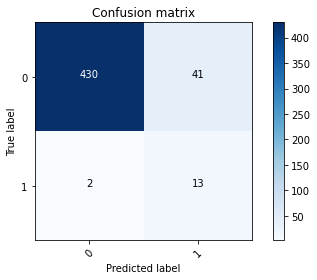

In [12]:
#2017 Data
x_test2017 = test_data[test_data["Year"] == 2017]
x_test2017_copy = x_test2017.copy()
y_test2017 = x_test2017["All_NBA"]
x_test2017 = x_test2017.iloc[:,1:-1].select_dtypes(exclude=['object'])
predicted_y = gauss_bayes_pipeline.predict(x_test2017)
x_test2017_copy.insert(len(x_test2017_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2017,predicted_y))

wrong_all_NBA = x_test2017_copy.loc[(x_test2017_copy.All_NBA == False) & (x_test2017_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2017_copy.loc[(x_test2017_copy.All_NBA == True) & (x_test2017_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

#grabbing top 15 players
grabTop15PlayersNoPipeline(x_test2017_copy,x_test2017)
matrix = confusion_matrix(y_test2017,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2017_non_smote.png")


0.9740740740740741
570         Clint Capela
597     DeMarcus Cousins
625       Andre Drummond
714        Dwight Howard
724         Kyrie Irving
748         Nikola Jokić
753       DeAndre Jordan
790           Kyle Lowry
881           Chris Paul
936          Ben Simmons
983         Kemba Walker
1005        Lou Williams
Name: Player, dtype: object

605    Stephen Curry
658      Paul George
Name: Player, dtype: object
True Top 15 Players: 492        LaMarcus Aldridge
501    Giannis Antetokounmpo
564             Jimmy Butler
605            Stephen Curry
607            Anthony Davis
615            DeMar DeRozan
628             Kevin Durant
632              Joel Embiid
658              Paul George
679             James Harden
733             LeBron James
783           Damian Lillard
867           Victor Oladipo
969       Karl-Anthony Towns
993        Russell Westbrook
Name: Player, dtype: object
Predicted Top 15 Players: ['Anthony Davis', 'James Harden', 'Damian Lillard', 'Giannis Antetokounm

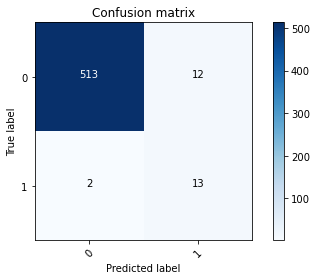

In [7]:
#2018 Data
x_test2018 = test_data[test_data["Year"] == 2018]
x_test2018_copy = x_test2018.copy()
y_test2018 = x_test2018["All_NBA"]
x_test2018 = x_test2018.iloc[:,1:-1].select_dtypes(exclude=['object'])
predicted_y = gauss_bayes_pipeline.predict(x_test2018)

x_test2018_copy.insert(len(x_test2018_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2018,predicted_y))

wrong_all_NBA = x_test2018_copy.loc[(x_test2018_copy.All_NBA == False) & (x_test2018_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2018_copy.loc[(x_test2018_copy.All_NBA == True) & (x_test2018_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

grabTop15PlayersNoPipeline(x_test2018_copy,x_test2018)
matrix = confusion_matrix(y_test2018,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2018_non_smote.png")


0.9735849056603774
1033     LaMarcus Aldridge
1065          Bradley Beal
1114          Clint Capela
1137           Mike Conley
1151         Anthony Davis
1172        Andre Drummond
1233      Montrezl Harrell
1379      Donovan Mitchell
1406          Jusuf Nurkić
1442         Julius Randle
1472         Pascal Siakam
1506    Karl-Anthony Towns
1518        Nikola Vučević
Name: Player, dtype: object

1149    Stephen Curry
Name: Player, dtype: object
True Top 15 Players: 1043    Giannis Antetokounmpo
1149            Stephen Curry
1175             Kevin Durant
1180              Joel Embiid
1208              Paul George
1212              Rudy Gobert
1227            Blake Griffin
1231             James Harden
1274             Kyrie Irving
1283             LeBron James
1294             Nikola Jokić
1326            Kawhi Leonard
1330           Damian Lillard
1522             Kemba Walker
1531        Russell Westbrook
Name: Player, dtype: object
Predicted Top 15 Players: ['Giannis Antetokounmpo', 

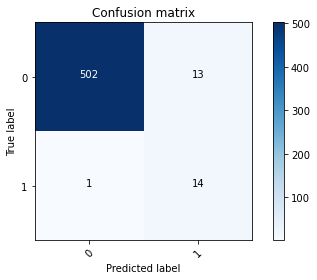

In [8]:
#2019 Data
x_test2019 = test_data[test_data["Year"] == 2019]
x_test2019_copy = x_test2019.copy()
y_test2019 = x_test2019["All_NBA"]
x_test2019 = x_test2019.iloc[:,1:-1].select_dtypes(exclude=['object'])
predicted_y = gauss_bayes_pipeline.predict(x_test2019)

x_test2019_copy.insert(len(x_test2019_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2019,predicted_y))

wrong_all_NBA = x_test2019_copy.loc[(x_test2019_copy.All_NBA == False) & (x_test2019_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2019_copy.loc[(x_test2019_copy.All_NBA == True) & (x_test2019_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

grabTop15PlayersNoPipeline(x_test2019_copy,x_test2019)
matrix = confusion_matrix(y_test2019,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2019_non_smote.png")


0.9773156899810964
1590        Bradley Beal
1610        Devin Booker
1695      Andre Drummond
1701         Joel Embiid
1891     Khris Middleton
1898    Donovan Mitchell
1991    Domantas Sabonis
2080          Trae Young
Name: Player, dtype: object

1637     Jimmy Butler
2004    Pascal Siakam
2006      Ben Simmons
2019     Jayson Tatum
Name: Player, dtype: object
True Top 15 Players: 1568    Giannis Antetokounmpo
1637             Jimmy Butler
1678            Anthony Davis
1689              Luka Dončić
1731              Rudy Gobert
1753             James Harden
1805             LeBron James
1816             Nikola Jokić
1849            Kawhi Leonard
1852           Damian Lillard
1951               Chris Paul
2004            Pascal Siakam
2006              Ben Simmons
2019             Jayson Tatum
2061        Russell Westbrook
Name: Player, dtype: object
Predicted Top 15 Players: ['Giannis Antetokounmpo', 'Russell Westbrook', 'James Harden', 'Damian Lillard', 'Kawhi Leonard', 'Anthony Davi

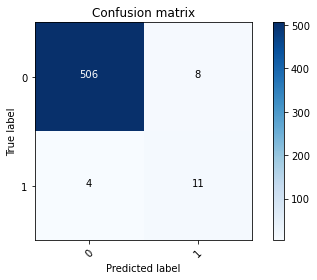

In [9]:
#2020 Data
x_test2020 = test_data[test_data["Year"] == 2020]
x_test2020_copy = x_test2020.copy()
y_test2020 = x_test2020["All_NBA"]
x_test2020 = x_test2020.iloc[:,1:-1].select_dtypes(exclude=['object'])
predicted_y = gauss_bayes_pipeline.predict(x_test2020)

x_test2020_copy.insert(len(x_test2020_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2020,predicted_y))

wrong_all_NBA = x_test2020_copy.loc[(x_test2020_copy.All_NBA == False) & (x_test2020_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2020_copy.loc[(x_test2020_copy.All_NBA == True) & (x_test2020_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

grabTop15PlayersNoPipeline(x_test2020_copy,x_test2020)
matrix = confusion_matrix(y_test2020,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2020_non_smote.png")


Running with SMOTE data

In [10]:
# #SMOTE by itself
smote = SMOTE()

#SMOTE with undersampling of majority class and samplng strategy
smote_over = SMOTE(sampling_strategy=0.1)
under = under_sampling.RandomUnderSampler(sampling_strategy=0.5)
pca = PCA(n_components=20)

# pipeline_no_undersample = Pipeline([('smote',smote),('naive_bayes',gauss_bayes)])
# pipeline_under_sample = Pipeline([('smote_over',smote_over),('under',under),('naive_bayes',gauss_bayes)])

# pipeline_no_undersample.fit(x_train,y_train)
# pipeline_under_sample.fit(x_train,y_train)

# predicted_y = pipeline_no_undersample.predict(x_test)
# print(accuracy_score(y_test,predicted_y))

# predicted_y = pipeline_under_sample.predict(x_test)
# print(accuracy_score(y_test,predicted_y))

# #With PCA
pipeline_no_undersample = Pipeline([('smote',smote),('pca',pca),('naive_bayes',gauss_bayes)])
pipeline_under_sample = Pipeline([('smote_over',SMOTE(sampling_strategy=0.1)),('under',under_sampling.RandomUnderSampler(sampling_strategy=0.5)),('pca',PCA(n_components=20)),('naive_bayes',gauss_bayes)])

pipeline_no_undersample.fit(x_train,y_train)
pipeline_under_sample.fit(x_train,y_train)

predicted_y = pipeline_no_undersample.predict(x_test)
print(accuracy_score(y_test,predicted_y))

predicted_y = pipeline_under_sample.predict(x_test)
print(accuracy_score(y_test,predicted_y))



0.9640287769784173
0.9496402877697842


0.948559670781893
27        Harrison Barnes
35           Bradley Beal
86            Mike Conley
113          Goran Dragić
114        Andre Drummond
144            Marc Gasol
149           Paul George
167         Blake Griffin
179         Tobias Harris
184        Gordon Hayward
214          Kyrie Irving
265        Damian Lillard
287           CJ McCollum
305          Paul Millsap
433    Karl-Anthony Towns
451          Kemba Walker
460      Hassan Whiteside
461        Andrew Wiggins
Name: Player, dtype: object

65          Jimmy Butler
97         Stephen Curry
154          Rudy Gobert
163       Draymond Green
171         James Harden
239       DeAndre Jordan
457    Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 15     Giannis Antetokounmpo
65              Jimmy Butler
97             Stephen Curry
99             Anthony Davis
107            DeMar DeRozan
118             Kevin Durant
154              Rudy Gobert
163           Draymond Green
171             James Harden


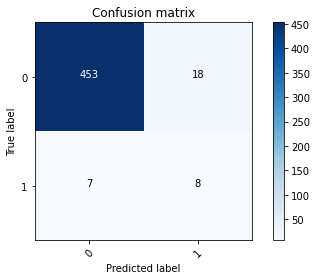

*************************************
0.934156378600823
6       LaMarcus Aldridge
27        Harrison Barnes
31          Nicolas Batum
35           Bradley Beal
48           Eric Bledsoe
86            Mike Conley
113          Goran Dragić
144            Marc Gasol
149           Paul George
167         Blake Griffin
170      Tim Hardaway Jr.
179         Tobias Harris
184        Gordon Hayward
197          Jrue Holiday
202            Al Horford
214          Kyrie Irving
230         Tyler Johnson
265        Damian Lillard
273            Kyle Lowry
287           CJ McCollum
305          Paul Millsap
350            Chris Paul
420           Jeff Teague
427         Klay Thompson
433    Karl-Anthony Towns
451          Kemba Walker
460      Hassan Whiteside
Name: Player, dtype: object

154          Rudy Gobert
163       Draymond Green
171         James Harden
239       DeAndre Jordan
457    Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 15     Giannis Antetokounmpo
65        

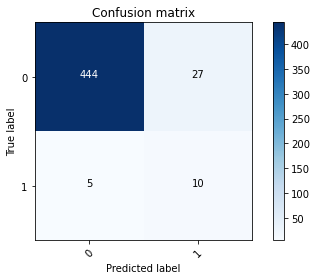

In [17]:
#2017 Data
predicted_y = pipeline_no_undersample.predict(x_test2017)
x_test2017_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2017_copy.insert(len(x_test2017_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2017,predicted_y))

wrong_all_NBA = x_test2017_copy.loc[(x_test2017_copy.All_NBA == False) & (x_test2017_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2017_copy.loc[(x_test2017_copy.All_NBA == True) & (x_test2017_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

#grabbing top 15 players
grabTop15PlayersNoUnderSample(x_test2017_copy,x_test2017)
matrix = confusion_matrix(y_test2017,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2017_smote_no_under.png")
plt.show()

print("*************************************")

predicted_y = pipeline_under_sample.predict(x_test2017)
x_test2017_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2017_copy.insert(len(x_test2017_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2017,predicted_y))

wrong_all_NBA = x_test2017_copy.loc[(x_test2017_copy.All_NBA == False) & (x_test2017_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2017_copy.loc[(x_test2017_copy.All_NBA == True) & (x_test2017_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)
grabTop15PlayersUnderSample(x_test2017_copy,x_test2017)
matrix = confusion_matrix(y_test2017,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2017_smote_under.png")


0.9666666666666667
516     Harrison Barnes
522        Bradley Beal
625      Andre Drummond
685       Tobias Harris
714       Dwight Howard
724        Kyrie Irving
807         CJ McCollum
821     Khris Middleton
983        Kemba Walker
1005       Lou Williams
Name: Player, dtype: object

492     LaMarcus Aldridge
564          Jimmy Butler
605         Stephen Curry
632           Joel Embiid
679          James Harden
733          LeBron James
969    Karl-Anthony Towns
993     Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 492        LaMarcus Aldridge
501    Giannis Antetokounmpo
564             Jimmy Butler
605            Stephen Curry
607            Anthony Davis
615            DeMar DeRozan
628             Kevin Durant
632              Joel Embiid
658              Paul George
679             James Harden
733             LeBron James
783           Damian Lillard
867           Victor Oladipo
969       Karl-Anthony Towns
993        Russell Westbrook
Name: Player, dtype:

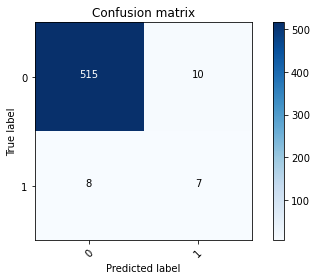

*************************************
0.9462962962962963
516     Harrison Barnes
517         Will Barton
522        Bradley Beal
537        Eric Bledsoe
570        Clint Capela
623        Goran Dragić
625      Andre Drummond
685       Tobias Harris
705        Jrue Holiday
712          Al Horford
714       Dwight Howard
724        Kyrie Irving
768         Jeremy Lamb
790          Kyle Lowry
807         CJ McCollum
821     Khris Middleton
846        Jamal Murray
881          Chris Paul
894         Otto Porter
909         J.J. Redick
926         Dario Šarić
936         Ben Simmons
983        Kemba Walker
1005       Lou Williams
Name: Player, dtype: object

605        Stephen Curry
632          Joel Embiid
679         James Harden
733         LeBron James
993    Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 492        LaMarcus Aldridge
501    Giannis Antetokounmpo
564             Jimmy Butler
605            Stephen Curry
607            Anthony Davis
615            DeMa

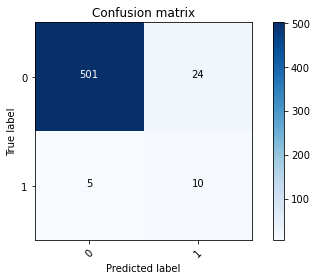

In [18]:
#2018 Data
predicted_y = pipeline_no_undersample.predict(x_test2018)
x_test2018_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2018_copy.insert(len(x_test2018_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2018,predicted_y))

wrong_all_NBA = x_test2018_copy.loc[(x_test2018_copy.All_NBA == False) & (x_test2018_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2018_copy.loc[(x_test2018_copy.All_NBA == True) & (x_test2018_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

#grabbing top 15 players
grabTop15PlayersNoUnderSample(x_test2018_copy,x_test2018)
matrix = confusion_matrix(y_test2018,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2018_smote_no_under.png")
plt.show()

print("*************************************")

predicted_y = pipeline_under_sample.predict(x_test2018)
x_test2018_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2018_copy.insert(len(x_test2018_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2018,predicted_y))

wrong_all_NBA = x_test2018_copy.loc[(x_test2018_copy.All_NBA == False) & (x_test2018_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2018_copy.loc[(x_test2018_copy.All_NBA == True) & (x_test2018_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)
grabTop15PlayersUnderSample(x_test2018_copy,x_test2018)
matrix = confusion_matrix(y_test2018,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2018_smote_under.png")


0.9679245283018868
1082    Bojan Bogdanović
1137         Mike Conley
1172      Andre Drummond
1237       Tobias Harris
1371     Khris Middleton
1472       Pascal Siakam
Name: Player, dtype: object

1043    Giannis Antetokounmpo
1149            Stephen Curry
1180              Joel Embiid
1208              Paul George
1212              Rudy Gobert
1231             James Harden
1274             Kyrie Irving
1283             LeBron James
1294             Nikola Jokić
1522             Kemba Walker
1531        Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 1043    Giannis Antetokounmpo
1149            Stephen Curry
1175             Kevin Durant
1180              Joel Embiid
1208              Paul George
1212              Rudy Gobert
1227            Blake Griffin
1231             James Harden
1274             Kyrie Irving
1283             LeBron James
1294             Nikola Jokić
1326            Kawhi Leonard
1330           Damian Lillard
1522             Kemba Walker
153

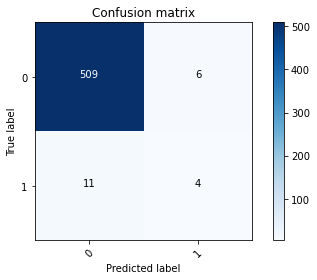

*************************************
0.9528301886792453
1033    LaMarcus Aldridge
1079         Eric Bledsoe
1082     Bojan Bogdanović
1095      Malcolm Brogdon
1109         Jimmy Butler
1135      Darren Collison
1137          Mike Conley
1172       Andre Drummond
1214         Aaron Gordon
1237        Tobias Harris
1318          Jeremy Lamb
1371      Khris Middleton
1392         Jamal Murray
1472        Pascal Siakam
1474          Ben Simmons
1492         Jayson Tatum
1518       Nikola Vučević
Name: Player, dtype: object

1149        Stephen Curry
1180          Joel Embiid
1212          Rudy Gobert
1231         James Harden
1283         LeBron James
1294         Nikola Jokić
1522         Kemba Walker
1531    Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 1043    Giannis Antetokounmpo
1149            Stephen Curry
1175             Kevin Durant
1180              Joel Embiid
1208              Paul George
1212              Rudy Gobert
1227            Blake Griffin
1231 

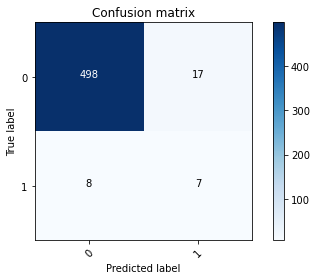

In [19]:
#2019 Data
predicted_y = pipeline_no_undersample.predict(x_test2019)
x_test2019_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2019_copy.insert(len(x_test2019_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2019,predicted_y))

wrong_all_NBA = x_test2019_copy.loc[(x_test2019_copy.All_NBA == False) & (x_test2019_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2019_copy.loc[(x_test2019_copy.All_NBA == True) & (x_test2019_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

#grabbing top 15 players
grabTop15PlayersNoUnderSample(x_test2019_copy,x_test2019)
matrix = confusion_matrix(y_test2019,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2019_smote_no_under.png")
plt.show()

print("*************************************")

predicted_y = pipeline_under_sample.predict(x_test2019)
x_test2019_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2019_copy.insert(len(x_test2019_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2019,predicted_y))

wrong_all_NBA = x_test2019_copy.loc[(x_test2019_copy.All_NBA == False) & (x_test2019_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2019_copy.loc[(x_test2019_copy.All_NBA == True) & (x_test2019_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)
grabTop15PlayersUnderSample(x_test2019_copy,x_test2019)
matrix = confusion_matrix(y_test2019,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2019_smote_under.png")


0.9716446124763705
1730    Shai Gilgeous-Alexander
1891            Khris Middleton
1898           Donovan Mitchell
Name: Player, dtype: object

1568    Giannis Antetokounmpo
1637             Jimmy Butler
1689              Luka Dončić
1731              Rudy Gobert
1753             James Harden
1805             LeBron James
1816             Nikola Jokić
1852           Damian Lillard
1951               Chris Paul
2004            Pascal Siakam
2006              Ben Simmons
2061        Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 1568    Giannis Antetokounmpo
1637             Jimmy Butler
1678            Anthony Davis
1689              Luka Dončić
1731              Rudy Gobert
1753             James Harden
1805             LeBron James
1816             Nikola Jokić
1849            Kawhi Leonard
1852           Damian Lillard
1951               Chris Paul
2004            Pascal Siakam
2006              Ben Simmons
2019             Jayson Tatum
2061        Russell Westbro

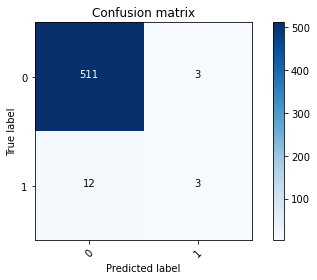

*************************************
0.9640831758034026
1557                Bam Adebayo
1602               Eric Bledsoe
1730    Shai Gilgeous-Alexander
1756           Montrezl Harrell
1759              Tobias Harris
1891            Khris Middleton
1898           Donovan Mitchell
2055                T.J. Warren
Name: Player, dtype: object

1568    Giannis Antetokounmpo
1637             Jimmy Butler
1689              Luka Dončić
1731              Rudy Gobert
1753             James Harden
1805             LeBron James
1816             Nikola Jokić
1852           Damian Lillard
2004            Pascal Siakam
2006              Ben Simmons
2061        Russell Westbrook
Name: Player, dtype: object
True Top 15 Players: 1568    Giannis Antetokounmpo
1637             Jimmy Butler
1678            Anthony Davis
1689              Luka Dončić
1731              Rudy Gobert
1753             James Harden
1805             LeBron James
1816             Nikola Jokić
1849            Kawhi Leonard
1852     

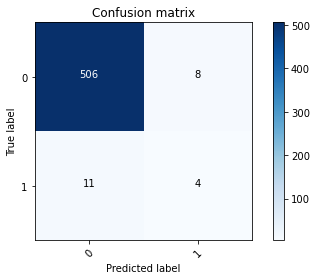

In [20]:
#2020 Data
predicted_y = pipeline_no_undersample.predict(x_test2020)
x_test2020_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2020_copy.insert(len(x_test2020_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2020,predicted_y))

wrong_all_NBA = x_test2020_copy.loc[(x_test2020_copy.All_NBA == False) & (x_test2020_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2020_copy.loc[(x_test2020_copy.All_NBA == True) & (x_test2020_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)

#grabbing top 15 players
grabTop15PlayersNoUnderSample(x_test2020_copy,x_test2020)
matrix = confusion_matrix(y_test2020,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2020_smote_no_under.png")
plt.show()

print("*************************************")

predicted_y = pipeline_under_sample.predict(x_test2020)
x_test2020_copy.drop(["Predicted_All_NBA"],axis=1,inplace=True)
x_test2020_copy.insert(len(x_test2020_copy.columns),"Predicted_All_NBA",predicted_y)

print(accuracy_score(y_test2020,predicted_y))

wrong_all_NBA = x_test2020_copy.loc[(x_test2020_copy.All_NBA == False) & (x_test2020_copy.Predicted_All_NBA == True),"Player"]
print(wrong_all_NBA)
print()
#players predicted not to be on All-NBA and was listed on All-NBA
right_all_NBA = x_test2020_copy.loc[(x_test2020_copy.All_NBA == True) & (x_test2020_copy.Predicted_All_NBA == False),"Player"]
print(right_all_NBA)
grabTop15PlayersUnderSample(x_test2020_copy,x_test2020)
matrix = confusion_matrix(y_test2020,predicted_y)
plot_confusion_matrix(matrix,classes=[0,1])
plt.savefig("2020_smote_under.png")
